# Index Creation and Analysis  Project



In this Project, I will choose six publicly traded companies and create four indexes to compare the performance of the six individual stocks with a price-weighted,equal-weighted, total return index and value-weighted index. I will also compare the risk/return of the indexes and individual stocks.

The time frame is beginning 2015 to November 22, 2022. 

Assumptions:
Price-weighted Index:
Constituents are weighted by their (Stock) Prices
Intuition: Purchase an equal amount of shares of each constituent (e.g. 1 Share)

Equal-Weighted Index:
Constituents are equal-weighted (in monetary terms)
Intuition: Invest equal dollar amounts into of each constituent (e.g USD 1000 per stock) 

Value-weighted Index:
Constituents are weighted in proportion to their Market Capitalization (=companies’ total equity value)
Market Capitalization = Stock Price * Shares Outstanding 
Total Shares vs Free Float (assume no changes in shares)

Total Return Index:
We consider corporate actions, stock splits, dividend payments and rights offerings companies undertake. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import pandas as pd
plt.style.use('seaborn')
pd.options.display.float_format = '{:.3f}'.format

In [2]:
stocks = yf.download(['GOOG','TSLA','AMZN','MCD','JPM','MSFT'],start='2014-12-31',
                     end='2022-11-22').Close

[*********************100%***********************]  6 of 6 completed


In [3]:
stocks.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2014-12-31,15.517,26.248,62.580,93.700,46.450,14.827
2015-01-02,15.426,26.169,62.490,93.260,46.760,14.621
2015-01-05,15.109,25.623,60.550,92.230,46.330,14.006
2015-01-06,14.764,25.029,58.980,92.400,45.650,14.085
2015-01-07,14.921,24.986,59.070,94.010,46.230,14.063


In [4]:
norm = stocks.div(stocks.iloc[0]).mul(100)
norm.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.410,99.698,99.856,99.530,100.667,98.606
2015-01-05,97.371,97.620,96.756,98.431,99.742,94.461
2015-01-06,95.147,95.357,94.247,98.613,98.278,94.996
2015-01-07,96.156,95.194,94.391,100.331,99.526,94.847


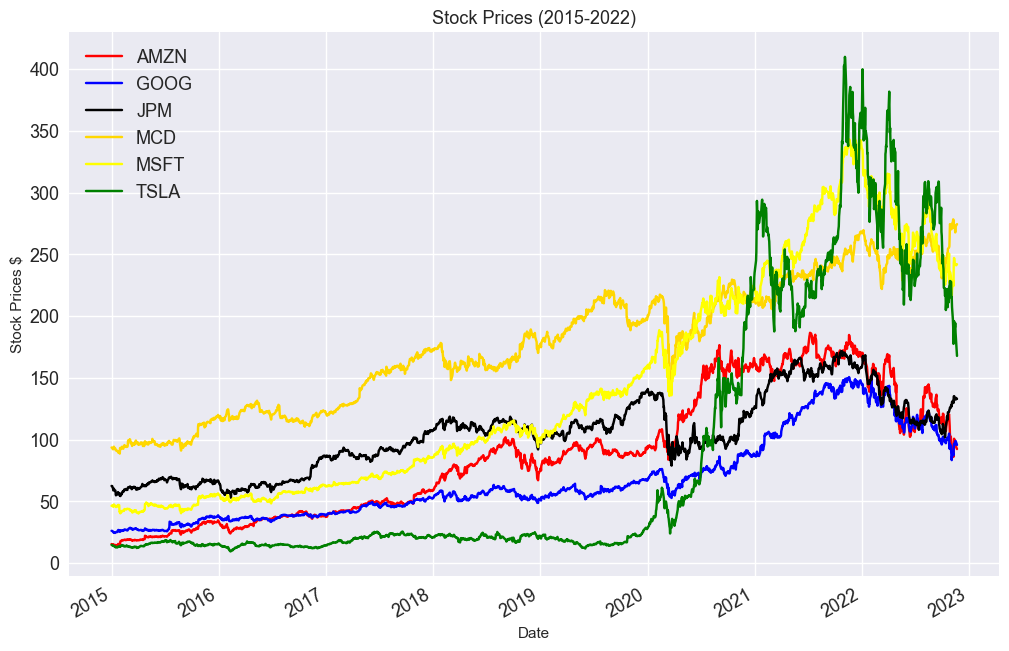

In [5]:
stocks.plot(figsize=(12,8),fontsize=13,color=['red','blue','black','gold','yellow','green'])
plt.title('Stock Prices (2015-2022)',fontsize=13)
plt.legend(fontsize=13)
plt.ylabel('Stock Prices $')
plt.show()

Mcdonald's stock price was the highest stand on November 22, 2022. Amazon had the lowest stock price. We can't measure the performance of individual stocks by comparing only the prices. We need to normalize the performance of all our stocks to compare the performance of the single stocks better. 

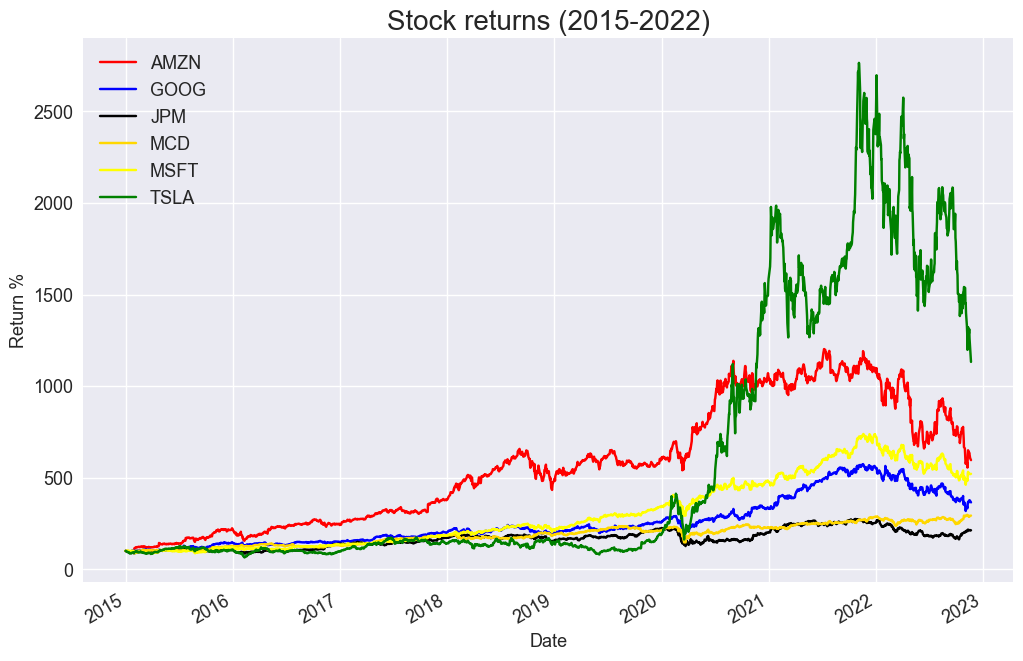

In [6]:
norm.plot(figsize=(12,8),fontsize=13,color=['red','blue','black','gold','yellow','green','orange'])
plt.legend(fontsize=13)
plt.title('Stock returns (2015-2022)',fontsize=20)
plt.ylabel('Return %',fontsize=13)
plt.xlabel('Date',fontsize=13)
plt.show()

I normalized the performance of the stocks to see how each stock performed beginning 2015 to now. Tesla stock performed the best, with a return of over 1000%. Amazon also performed well at over 500%. 

# Price-weighted Index

In [7]:
stocks.head(5)

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2014-12-31,15.517,26.248,62.580,93.700,46.450,14.827
2015-01-02,15.426,26.169,62.490,93.260,46.760,14.621
2015-01-05,15.109,25.623,60.550,92.230,46.330,14.006
2015-01-06,14.764,25.029,58.980,92.400,45.650,14.085
2015-01-07,14.921,24.986,59.070,94.010,46.230,14.063


In [8]:
stocks.sum(axis=1).div(stocks.sum(axis=1)[0]).mul(100)

Date
2014-12-31   100.000
2015-01-02    99.770
2015-01-05    97.889
2015-01-06    96.756
2015-01-07    97.670
               ...  
2022-11-15   399.051
2022-11-16   397.339
2022-11-17   394.913
2022-11-18   393.548
2022-11-21   387.849
Length: 1988, dtype: float64

In [9]:
norm['PWI'] = 100

In [10]:
norm['PWI'] = stocks.sum(axis=1).div(stocks.sum(axis=1)[0]).mul(100)

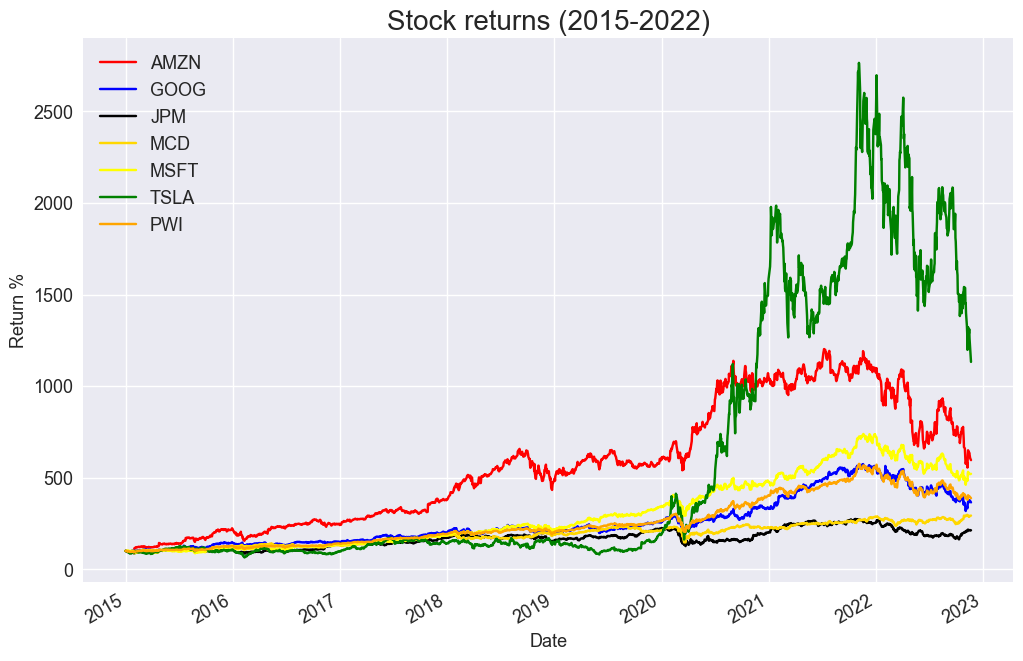

In [11]:
norm.plot(figsize=(12,8),fontsize=13,color=['red','blue','black','gold','yellow','green','orange','navy'])
plt.legend(fontsize=13)
plt.title('Stock returns (2015-2022)',fontsize=20)
plt.ylabel('Return %',fontsize=13)
plt.xlabel('Date',fontsize=13)
plt.show()

I created a Price-weighted index to compare the performance of each stock to the index. Tesla, Amazon and Microsoft outperformed our index.

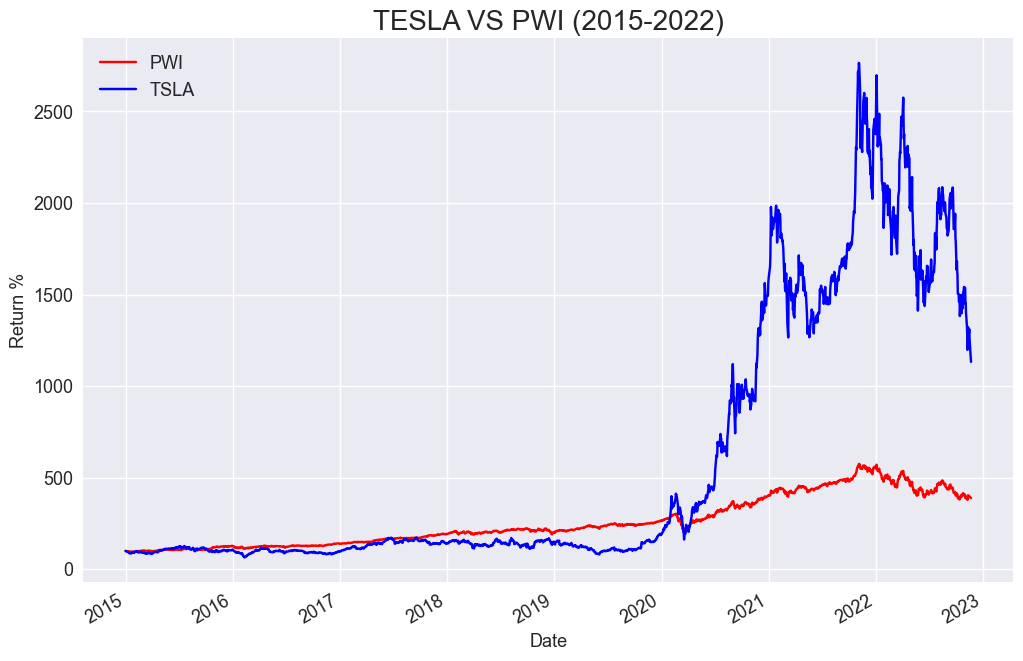

In [12]:
norm.loc[:,['PWI','TSLA']].plot(figsize=(12,8),fontsize=13,color=['red','blue',])
plt.legend(fontsize=13)
plt.title('TESLA VS PWI (2015-2022)',fontsize=20)
plt.ylabel('Return %',fontsize=13)
plt.xlabel('Date',fontsize=13)
plt.show()

Tesla outperformed our price-weighted index by a large margin.

In [13]:
stocks.head(5)

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2014-12-31,15.517,26.248,62.580,93.700,46.450,14.827
2015-01-02,15.426,26.169,62.490,93.260,46.760,14.621
2015-01-05,15.109,25.623,60.550,92.230,46.330,14.006
2015-01-06,14.764,25.029,58.980,92.400,45.650,14.085
2015-01-07,14.921,24.986,59.070,94.010,46.230,14.063


In [14]:
weights_PWI = stocks.div(stocks.sum(axis=1),axis='rows')

In [15]:
weights_PWI.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2014-12-31,0.060,0.101,0.241,0.361,0.179,0.057
2015-01-02,0.060,0.101,0.242,0.360,0.181,0.057
2015-01-05,0.060,0.101,0.239,0.363,0.183,0.055
2015-01-06,0.059,0.100,0.235,0.368,0.182,0.056
2015-01-07,0.059,0.099,0.233,0.371,0.183,0.056


In [16]:
stocks.sum(axis=1)

Date
2014-12-31    259.323
2015-01-02    258.725
2015-01-05    253.849
2015-01-06    250.909
2015-01-07    253.281
               ...   
2022-11-15   1034.830
2022-11-16   1030.390
2022-11-17   1024.100
2022-11-18   1020.560
2022-11-21   1005.780
Length: 1988, dtype: float64

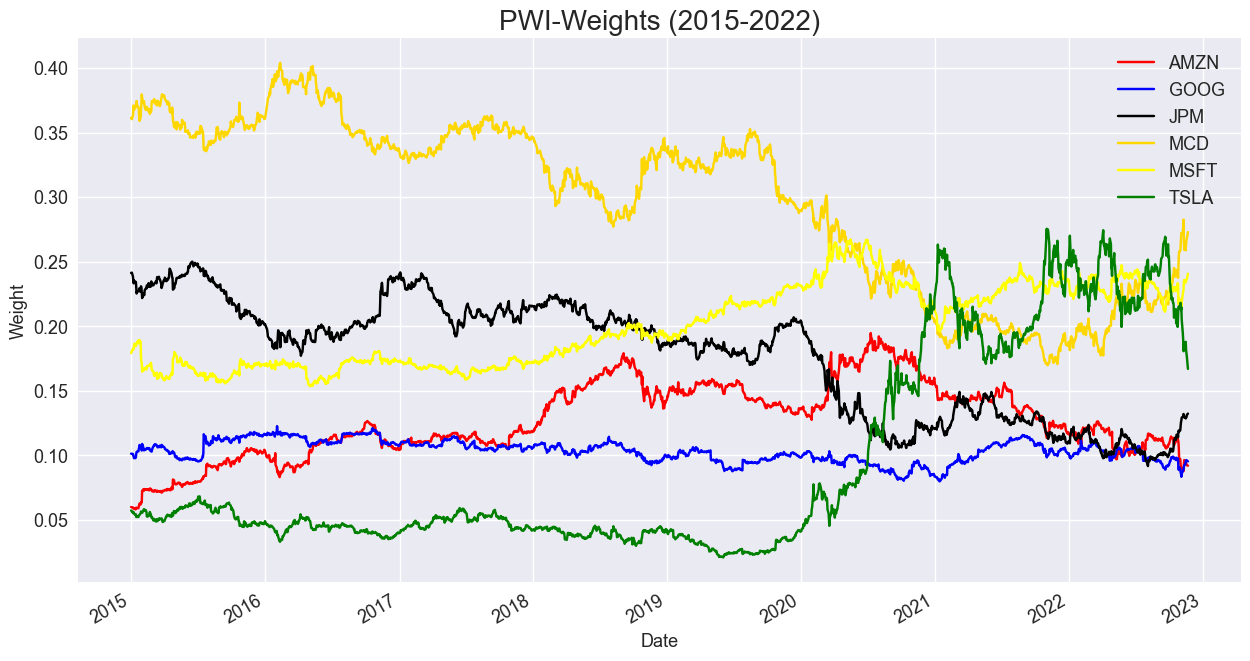

In [17]:
weights_PWI.plot(figsize=(15,8),fontsize=13,color=['red','blue','black','gold','yellow','green','orange'])
plt.legend(fontsize=13)
plt.title('PWI-Weights (2015-2022)',fontsize=20)
plt.ylabel('Weight',fontsize=13)
plt.xlabel('Date',fontsize=13)
plt.show()

Mcdonald's makes up 27.3% of our portfolio, followed by Microsoft in second and Tesla in third place.

In [18]:
weights_PWI.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2014-12-31,0.060,0.101,0.241,0.361,0.179,0.057
2015-01-02,0.060,0.101,0.242,0.360,0.181,0.057
2015-01-05,0.060,0.101,0.239,0.363,0.183,0.055
2015-01-06,0.059,0.100,0.235,0.368,0.182,0.056
2015-01-07,0.059,0.099,0.233,0.371,0.183,0.056


# Equal-weighted Index

In [19]:
stocks.head(5)

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2014-12-31,15.517,26.248,62.580,93.700,46.450,14.827
2015-01-02,15.426,26.169,62.490,93.260,46.760,14.621
2015-01-05,15.109,25.623,60.550,92.230,46.330,14.006
2015-01-06,14.764,25.029,58.980,92.400,45.650,14.085
2015-01-07,14.921,24.986,59.070,94.010,46.230,14.063


In [20]:
norm.head(5)

,AMZN,GOOG,JPM,MCD,MSFT,TSLA,PWI
Date,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.410,99.698,99.856,99.530,100.667,98.606,99.770
2015-01-05,97.371,97.620,96.756,98.431,99.742,94.461,97.889
2015-01-06,95.147,95.357,94.247,98.613,98.278,94.996,96.756
2015-01-07,96.156,95.194,94.391,100.331,99.526,94.847,97.670


In [21]:
ret = stocks.pct_change().dropna()

In [22]:
ret['ret_Mean']= ret.mean(axis=1)

In [23]:
ret.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA,ret_Mean
Date,,,,,,,
2015-01-02,-0.006,-0.003,-0.001,-0.005,0.007,-0.014,-0.004
2015-01-05,-0.021,-0.021,-0.031,-0.011,-0.009,-0.042,-0.022
2015-01-06,-0.023,-0.023,-0.026,0.002,-0.015,0.006,-0.013
2015-01-07,0.011,-0.002,0.002,0.017,0.013,-0.002,0.006
2015-01-08,0.007,0.003,0.022,0.004,0.029,-0.002,0.011


In [24]:
ret.ret_Mean.add(1).cumprod().mul(100)

Date
2015-01-02    99.628
2015-01-05    97.392
2015-01-06    96.108
2015-01-07    96.732
2015-01-08    97.762
               ...  
2022-11-15   589.834
2022-11-16   586.252
2022-11-17   581.383
2022-11-18   579.162
2022-11-21   569.064
Name: ret_Mean, Length: 1987, dtype: float64

In [25]:
norm['EWI']= 100

In [26]:
ret.head(5)

,AMZN,GOOG,JPM,MCD,MSFT,TSLA,ret_Mean
Date,,,,,,,
2015-01-02,-0.006,-0.003,-0.001,-0.005,0.007,-0.014,-0.004
2015-01-05,-0.021,-0.021,-0.031,-0.011,-0.009,-0.042,-0.022
2015-01-06,-0.023,-0.023,-0.026,0.002,-0.015,0.006,-0.013
2015-01-07,0.011,-0.002,0.002,0.017,0.013,-0.002,0.006
2015-01-08,0.007,0.003,0.022,0.004,0.029,-0.002,0.011


In [27]:
norm.iloc[1:, -1] = ret.ret_Mean.add(1).cumprod().mul(100)

In [28]:
norm.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA,PWI,EWI
Date,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.410,99.698,99.856,99.530,100.667,98.606,99.770,99.628
2015-01-05,97.371,97.620,96.756,98.431,99.742,94.461,97.889,97.392
2015-01-06,95.147,95.357,94.247,98.613,98.278,94.996,96.756,96.108
2015-01-07,96.156,95.194,94.391,100.331,99.526,94.847,97.670,96.732


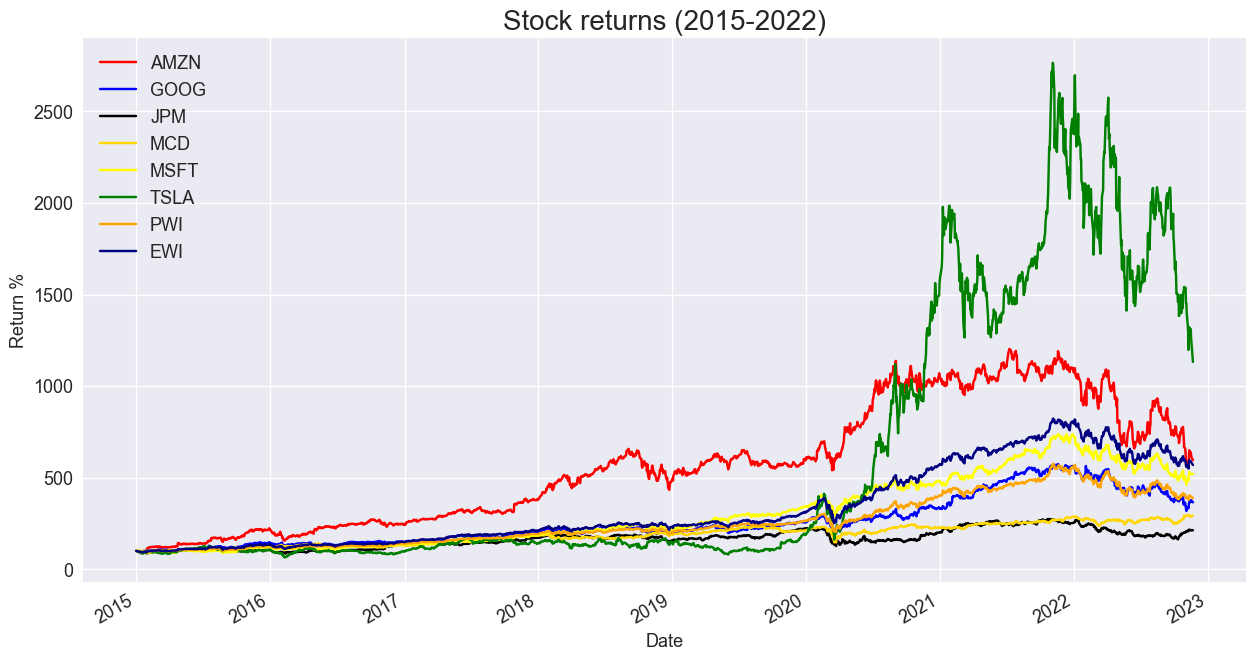

In [29]:
norm.plot(figsize=(15,8),fontsize=13,color=['red','blue','black','gold','yellow','green','orange','navy'])
plt.legend(fontsize=13)
plt.title('Stock returns (2015-2022)',fontsize=20)
plt.ylabel('Return %',fontsize=13)
plt.xlabel('Date',fontsize=13)
plt.show()

Again, Tesla outperforms all indexes and stocks in our portfolio. Amazon comes in second, and Google comes in third place. The equally-weighted index exceeds the price-weighted index. 

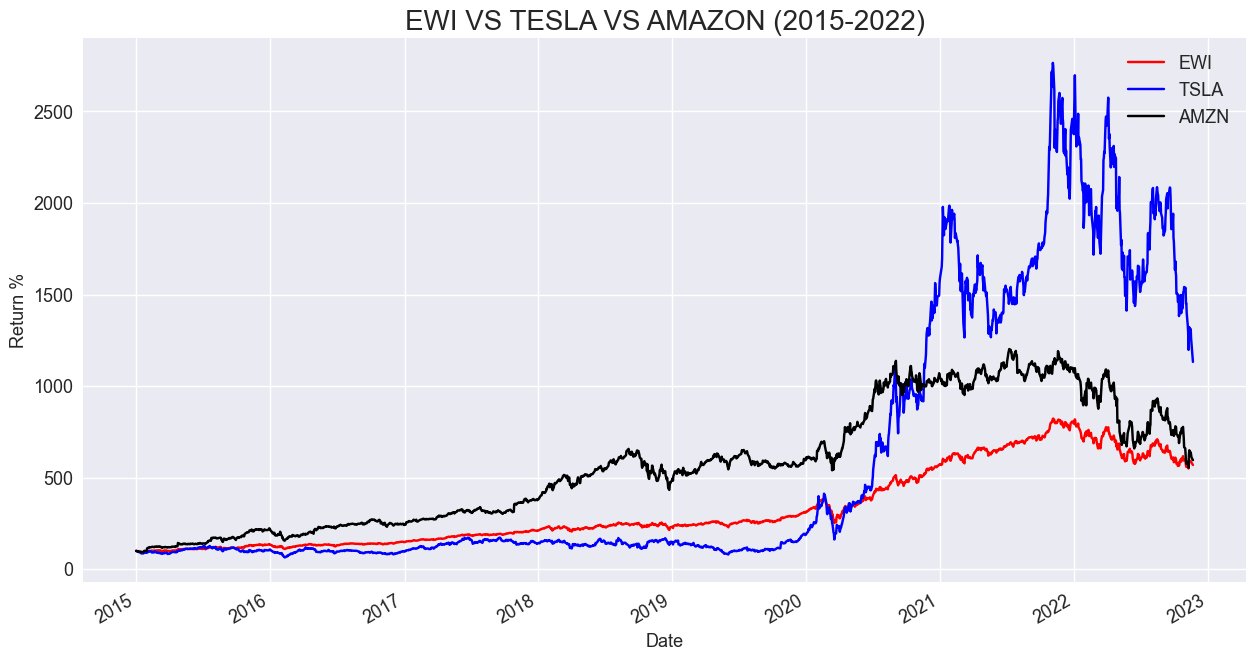

In [30]:
norm.loc[:,['EWI','TSLA','AMZN']].plot(figsize=(15,8),fontsize=13,color=['red','blue','black'])
plt.legend(fontsize=13)
plt.title('EWI VS TESLA VS AMAZON (2015-2022)',fontsize=20)
plt.ylabel('Return %',fontsize=13)
plt.xlabel('Date',fontsize=13)
plt.show()

Tesla and Amazon outperformed our equally-weighted index.

In [31]:
weights_EWI = stocks.copy()

In [32]:
weights_EWI.iloc[:,:]= 1/6

In [33]:
weights_EWI.head(5)

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2014-12-31,0.167,0.167,0.167,0.167,0.167,0.167
2015-01-02,0.167,0.167,0.167,0.167,0.167,0.167
2015-01-05,0.167,0.167,0.167,0.167,0.167,0.167
2015-01-06,0.167,0.167,0.167,0.167,0.167,0.167
2015-01-07,0.167,0.167,0.167,0.167,0.167,0.167


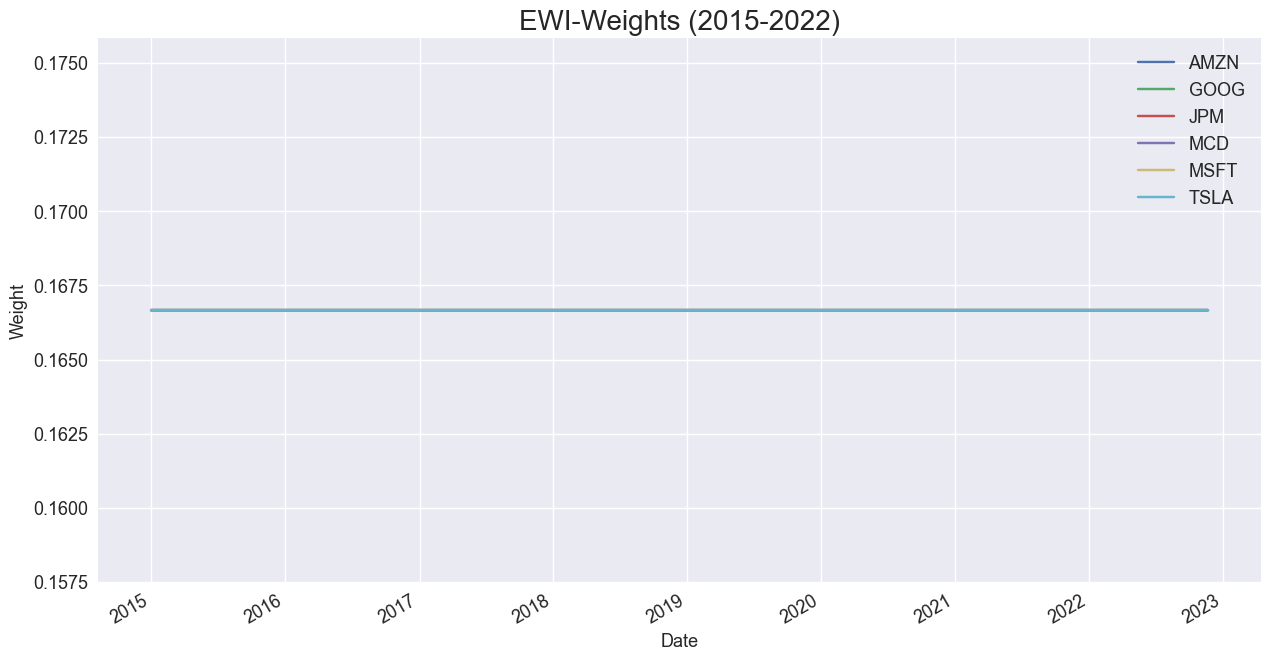

In [34]:
weights_EWI.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.title('EWI-Weights (2015-2022)',fontsize=20)
plt.ylabel('Weight',fontsize=13)
plt.xlabel('Date',fontsize=13)
plt.show()

All stocks are equally weighted, meaning we own the same number of shares for all stocks.

# Value-Weighted Index 

In [35]:
listings = pd.read_csv('listings_clean.csv')
listings.set_index('Symbol',inplace=True)

In [36]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6852 entries, A to ZYXI
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Exchange    6852 non-null   object 
 1   Name        6852 non-null   object 
 2   Last_Price  6852 non-null   float64
 3   Market_Cap  5954 non-null   float64
 4   IPO_Year    6852 non-null   int64  
 5   Sector      5309 non-null   object 
 6   Industry    5309 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 428.2+ KB


In [37]:
ticker = ['GOOG','TSLA','AMZN','MCD','JPM','MSFT']

In [38]:
listings = listings.loc[ticker,['Last_Price','Market_Cap']]

In [39]:
listings

,Last_Price,Market_Cap
Symbol,,
GOOG,1202.160,835725277815.360
TSLA,276.060,47681493701.220
AMZN,1847.330,907413834783.700
MCD,189.220,144813345561.040
JPM,105.340,342130105315.060
MSFT,120.190,922123334074.740


In [40]:
listings['Shares'] = listings.Market_Cap.div(listings.Last_Price)

In [41]:
stocks.head(5)

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2014-12-31,15.517,26.248,62.580,93.700,46.450,14.827
2015-01-02,15.426,26.169,62.490,93.260,46.760,14.621
2015-01-05,15.109,25.623,60.550,92.230,46.330,14.006
2015-01-06,14.764,25.029,58.980,92.400,45.650,14.085
2015-01-07,14.921,24.986,59.070,94.010,46.230,14.063


In [42]:
mcap = stocks.mul(listings.Shares, axis = 'columns')

In [43]:
mcap.head(5)

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2014-12-31,7622240808.099,18247208203.227,203251401339.239,71710231672.837,356374320420.134,2560999081.784
2015-01-02,7577295605.004,18192091906.606,202959092988.344,71373496017.214,358752687857.404,2525303424.206
2015-01-05,7421830032.727,17812866539.526,196658226844.526,70585220099.479,355453663001.422,2419137071.810
2015-01-06,7252364904.511,17400016081.243,191559079693.065,70715322644.582,350236555516.769,2432839638.280
2015-01-07,7329238089.340,17370205785.079,191851388043.960,71947484016.214,354686424096.519,2429039711.538


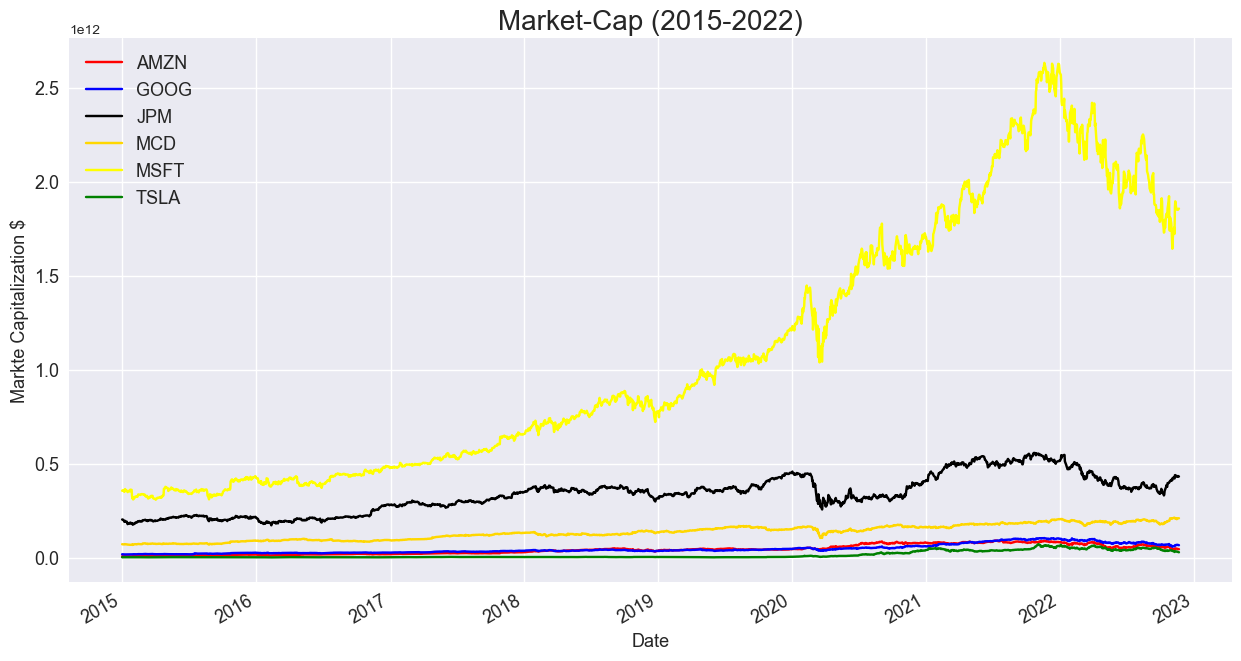

In [44]:
mcap. plot(figsize=(15,8),fontsize=13,color=['red','blue','black','gold','yellow','green',])
plt.legend(fontsize=13)
plt.title('Market-Cap (2015-2022)',fontsize=20)
plt.ylabel('Markte Capitalization $',fontsize=13)
plt.xlabel('Date',fontsize=13)
plt.show()

Microsoft has the highest Market Cap among all stocks at around 1.85T.

In [45]:
mcap.sum(axis=1)

Date
2014-12-31    659766401525.319
2015-01-02    661379967798.778
2015-01-05    650350943589.489
2015-01-06    639596178478.450
2015-01-07    645613779742.651
                    ...       
2022-11-15   2644008205350.977
2022-11-16   2644323763849.502
2022-11-17   2640603485045.764
2022-11-18   2639954136303.424
2022-11-21   2640313737142.916
Length: 1988, dtype: float64

In [46]:
weights_VWI = (mcap.div(mcap.sum(axis=1),axis='rows'))

In [47]:
weights_VWI.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2014-12-31,0.012,0.028,0.308,0.109,0.540,0.004
2015-01-02,0.011,0.028,0.307,0.108,0.542,0.004
2015-01-05,0.011,0.027,0.302,0.109,0.547,0.004
2015-01-06,0.011,0.027,0.300,0.111,0.548,0.004
2015-01-07,0.011,0.027,0.297,0.111,0.549,0.004


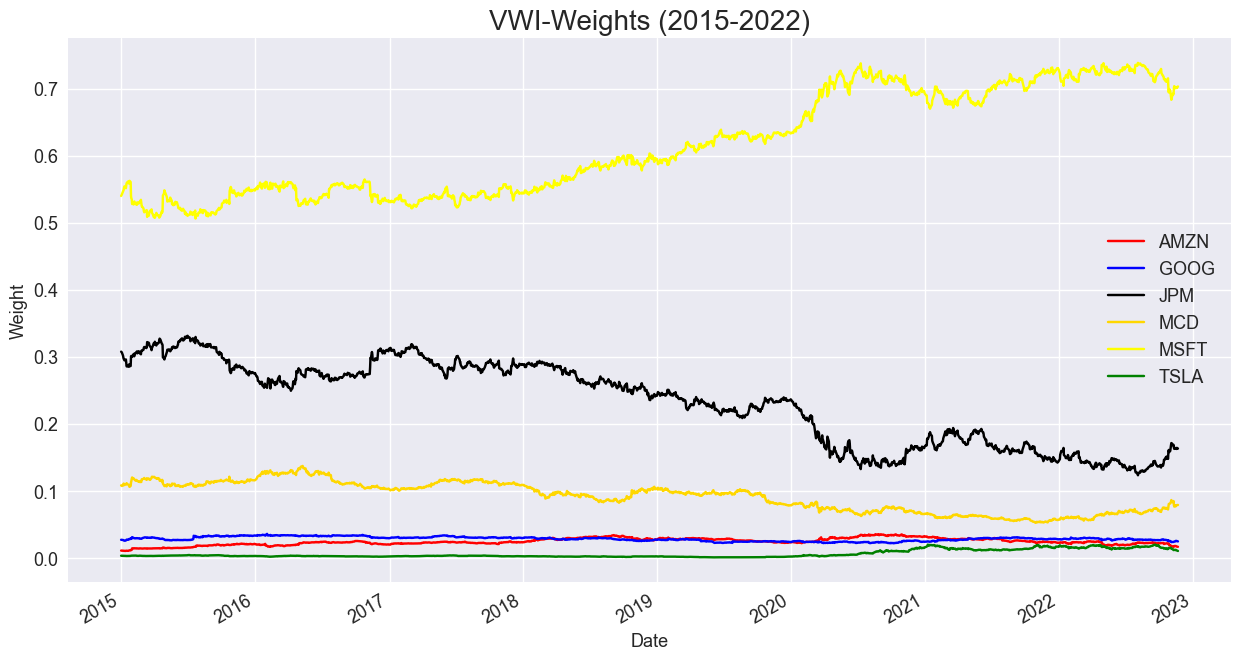

In [48]:
weights_VWI. plot(figsize=(15,8),fontsize=13,color=['red','blue','black','gold','yellow','green'])
plt.legend(fontsize=13)
plt.title('VWI-Weights (2015-2022)',fontsize=20)
plt.ylabel('Weight',fontsize=13)
plt.xlabel('Date',fontsize=13)
plt.show()

Microsoft makes up around 70% of our portfolio. J.P. Morgan makes up 1.7%, and Mcdonald's makes up 8% of my portfolio.

In [49]:
stocks.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2014-12-31,15.517,26.248,62.580,93.700,46.450,14.827
2015-01-02,15.426,26.169,62.490,93.260,46.760,14.621
2015-01-05,15.109,25.623,60.550,92.230,46.330,14.006
2015-01-06,14.764,25.029,58.980,92.400,45.650,14.085
2015-01-07,14.921,24.986,59.070,94.010,46.230,14.063


In [50]:
ret = stocks.pct_change().dropna()
ret.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2015-01-02,-0.006,-0.003,-0.001,-0.005,0.007,-0.014
2015-01-05,-0.021,-0.021,-0.031,-0.011,-0.009,-0.042
2015-01-06,-0.023,-0.023,-0.026,0.002,-0.015,0.006
2015-01-07,0.011,-0.002,0.002,0.017,0.013,-0.002
2015-01-08,0.007,0.003,0.022,0.004,0.029,-0.002


In [51]:
weights_VWI.shift().head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,0.012,0.028,0.308,0.109,0.540,0.004
2015-01-05,0.011,0.028,0.307,0.108,0.542,0.004
2015-01-06,0.011,0.027,0.302,0.109,0.547,0.004
2015-01-07,0.011,0.027,0.300,0.111,0.548,0.004


In [52]:
norm['VWI'] = ret.mul(weights_VWI.shift()).sum(axis=1).add(1).cumprod().mul(100)

In [53]:
norm.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA,PWI,EWI,VWI
Date,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.410,99.698,99.856,99.530,100.667,98.606,99.770,99.628,100.245
2015-01-05,97.371,97.620,96.756,98.431,99.742,94.461,97.889,97.392,98.573
2015-01-06,95.147,95.357,94.247,98.613,98.278,94.996,96.756,96.108,96.943
2015-01-07,96.156,95.194,94.391,100.331,99.526,94.847,97.670,96.732,97.855


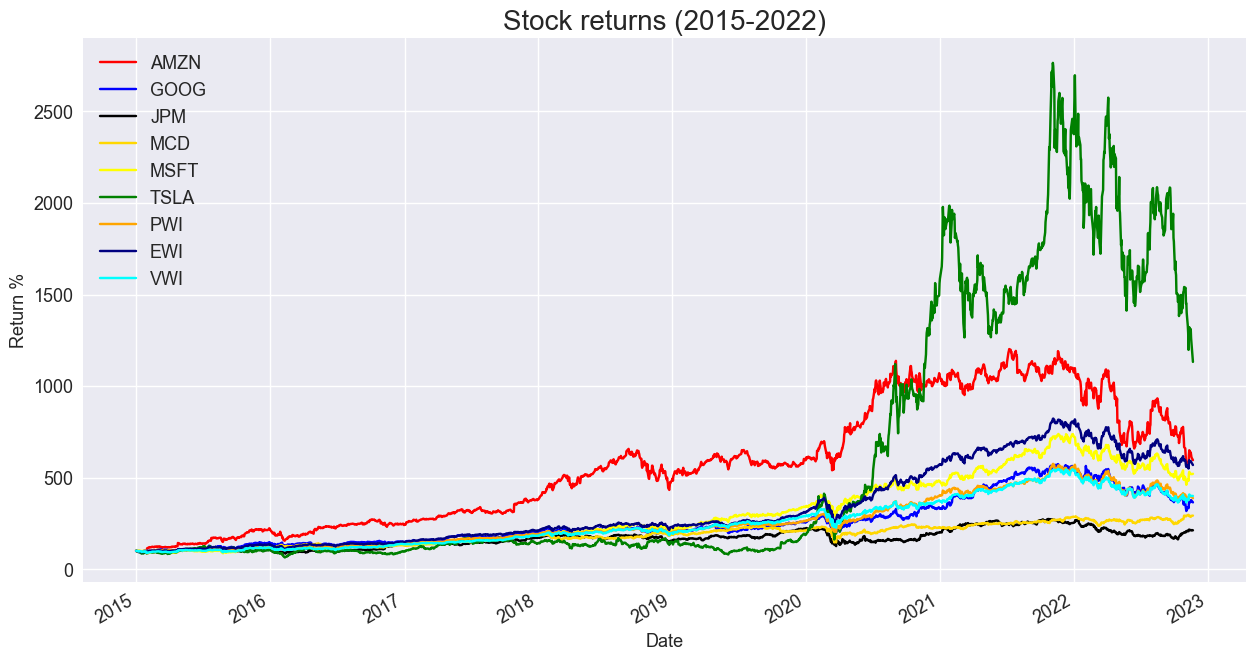

In [54]:
norm.plot(figsize=(15,8),fontsize=13,color=['red','blue','black','gold','yellow','green','orange','navy','aqua'])
plt.legend(fontsize=13)
plt.title('Stock returns (2015-2022)',fontsize=20)
plt.ylabel('Return %',fontsize=13)
plt.xlabel('Date',fontsize=13)
plt.show()

Tesla, Amazon and the equally-weighted index outperformed all other indexes and stocks.

## Comaparison of weighting methods

In [55]:
norm.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA,PWI,EWI,VWI
Date,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.410,99.698,99.856,99.530,100.667,98.606,99.770,99.628,100.245
2015-01-05,97.371,97.620,96.756,98.431,99.742,94.461,97.889,97.392,98.573
2015-01-06,95.147,95.357,94.247,98.613,98.278,94.996,96.756,96.108,96.943
2015-01-07,96.156,95.194,94.391,100.331,99.526,94.847,97.670,96.732,97.855


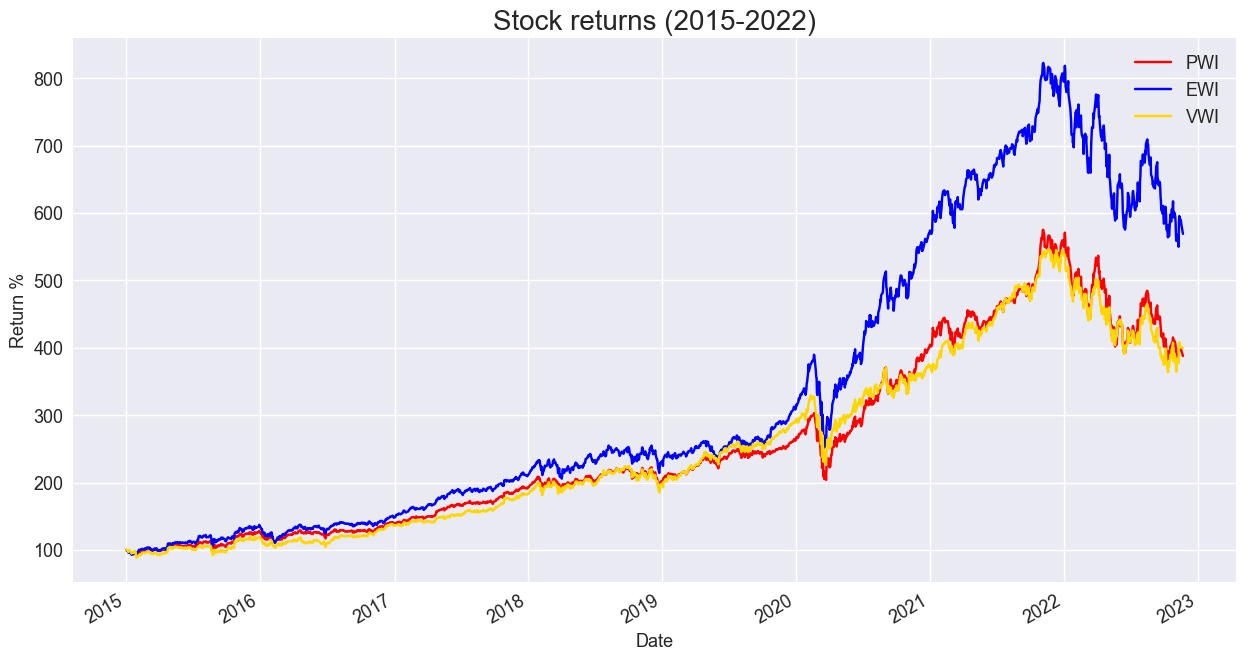

In [56]:
norm.iloc[:,-3:].plot(figsize=(15,8),fontsize=13,color=['red','blue','gold'])
plt.legend(fontsize=13)
plt.title('Stock returns (2015-2022)',fontsize=20)
plt.ylabel('Return %',fontsize=13)
plt.xlabel('Date',fontsize=13)
plt.show()


The equally-weighted index outperformed our two other indexes. 

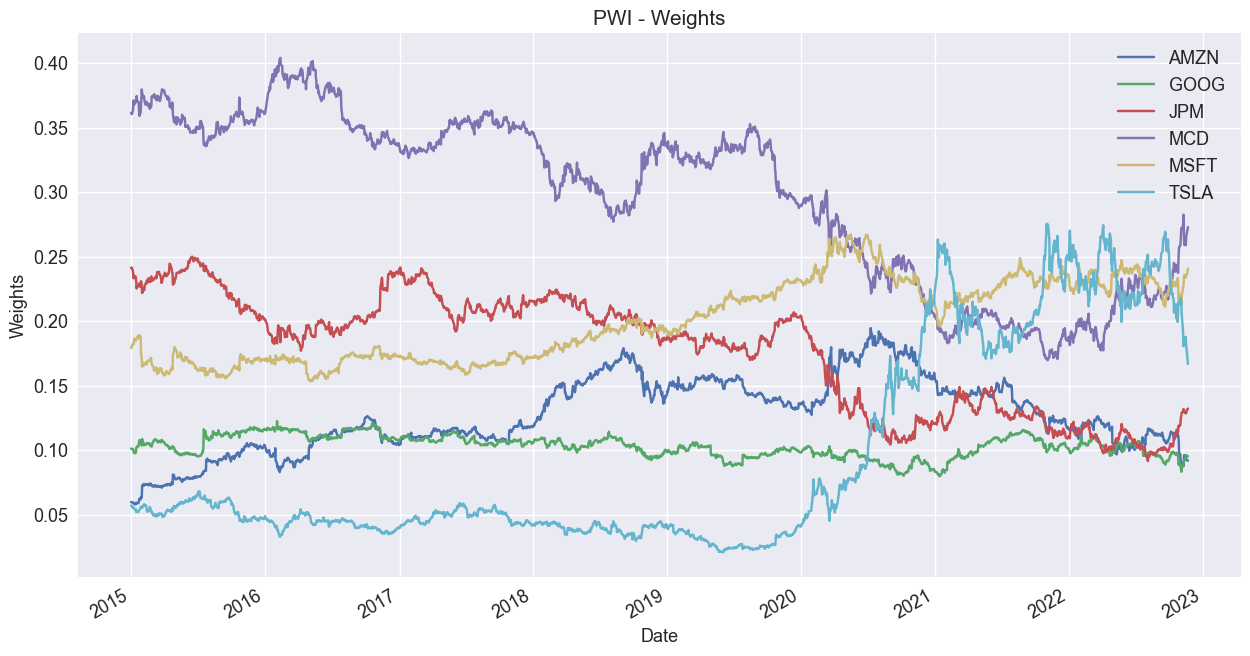

In [57]:
weights_PWI.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.title("PWI - Weights", fontsize = 15)
plt.ylabel('Weights',fontsize=13)
plt.xlabel('Date',fontsize=13)
plt.show()

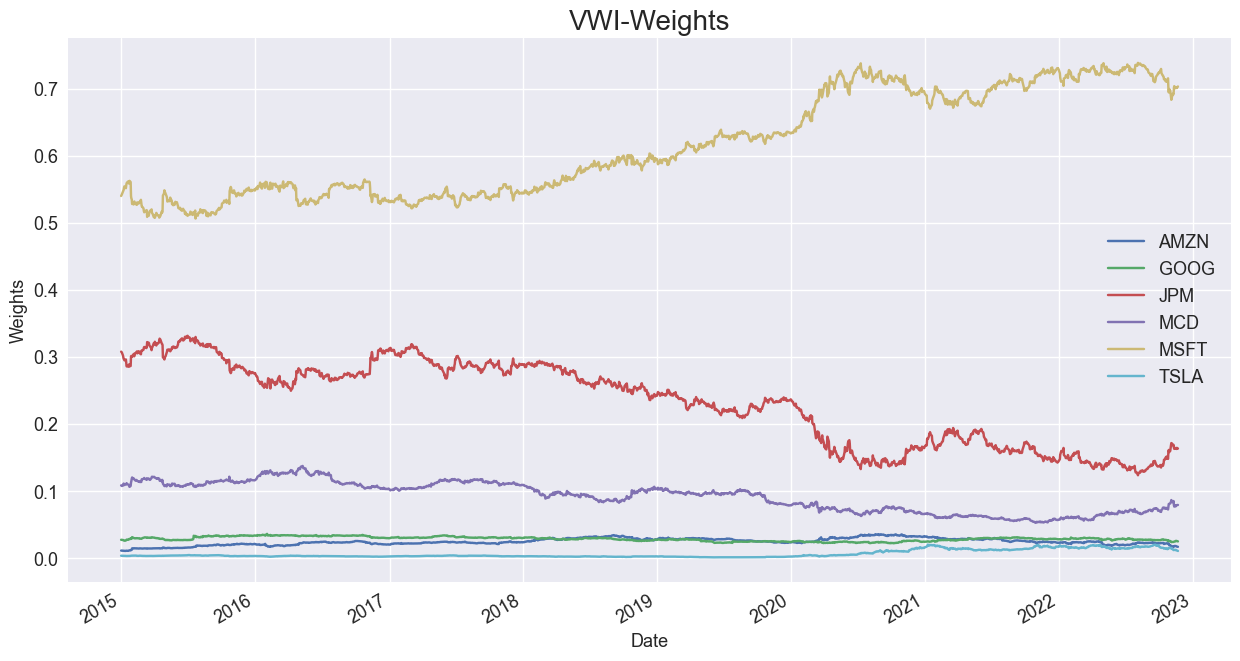

In [58]:
weights_VWI.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.title('VWI-Weights',fontsize=20)
plt.ylabel('Weights',fontsize=13)
plt.xlabel('Date',fontsize=13)
plt.show()

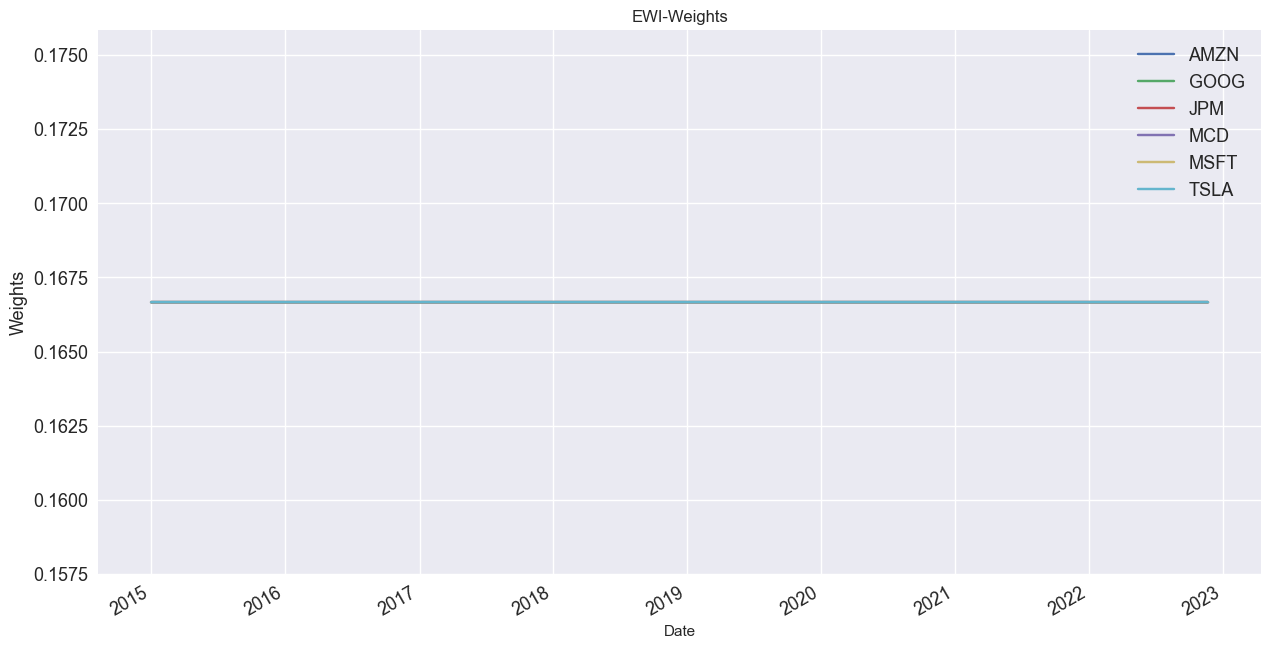

In [59]:
weights_EWI.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.title('EWI-Weights')
plt.ylabel('Weights',fontsize=13)
plt.xlabel('Date')
plt.show()

In [60]:
summary = norm.pct_change().agg(['mean','std']).T
summary

,mean,std
AMZN,0.001,0.021
GOOG,0.001,0.018
JPM,0.001,0.018
MCD,0.001,0.014
MSFT,0.001,0.018
TSLA,0.002,0.036
PWI,0.001,0.014
EWI,0.001,0.015
VWI,0.001,0.015


In [61]:
summary.columns = ['Return','Risk']

In [62]:
summary["Return"] = summary["Return"]*252
summary["Risk"] = summary["Risk"] * np.sqrt(252)

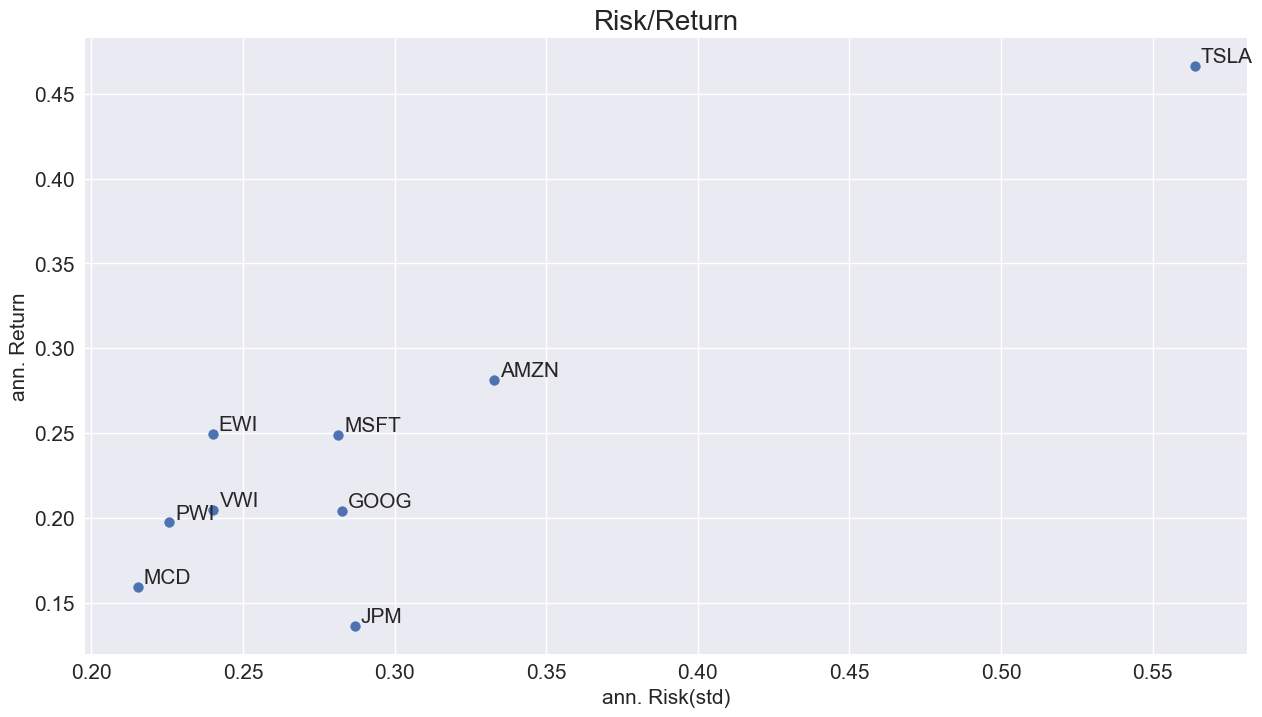

In [63]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (15, 8), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

Tesla has the highest average return and highest risk(standard deviation). The equally-weighted index has a higher average return than the two other indexes, slightly higher risk than PWI, and lower risk than VWI. 

In [64]:
summary

,Return,Risk
AMZN,0.281,0.333
GOOG,0.204,0.283
JPM,0.137,0.287
MCD,0.159,0.215
MSFT,0.249,0.281
TSLA,0.466,0.564
PWI,0.198,0.226
EWI,0.250,0.240
VWI,0.205,0.240


# Price Index vs. Performance/Total Return Index

In [65]:
stock = yf.download(['GOOG','TSLA','AMZN','MCD','JPM','MSFT'],start='2014-12-31',
                     end='2022-11-22')

[*********************100%***********************]  6 of 6 completed


In [66]:
stock.head()

Adj Close                                     Close                \
                AMZN   GOOG    JPM    MCD   MSFT   TSLA   AMZN   GOOG    JPM   
Date                                                                           
2014-12-31    15.517 26.248 50.056 76.534 40.541 14.827 15.517 26.248 62.580   
2015-01-02    15.426 26.169 50.305 76.175 40.811 14.621 15.426 26.169 62.490   
2015-01-05    15.109 25.623 48.744 75.334 40.436 14.006 15.109 25.623 60.550   
2015-01-06    14.764 25.029 47.480 75.472 39.843 14.085 14.764 25.029 58.980   
2015-01-07    14.921 24.986 47.552 76.788 40.349 14.063 14.921 24.986 59.070   

                   ...   Open                         Volume            \
              MCD  ...    JPM    MCD   MSFT   TSLA      AMZN      GOOG   
Date               ...                                                   
2014-12-31 93.700  ... 63.300 93.750 46.730 14.873  40960000  27364925   
2015-01-02 93.260  ... 62.180 94.130 46.660 14.858  55664000  28951268   
2015-01-05 92.230  ... 62.060 93.300 46.370 14.303  55484000  41196796   
2015-01-06 92.400  ... 60.640 92.670 46.380 14.004  70380000  57998800   
2015-01-07 94.010  ... 59.890 93.260 45.980 14.223  52806000  41301082   

                                                   
                 JPM      MCD      MSFT      TSLA  
Date                                               
2014-12-31  18529400  4589300  21552500  34462500  
2015-01-02  12600000  6019700  27913900  71466000  
2015-01-05  20100600  6211900  39673900  80527500  
2015-01-06  29074100  6484100  36447900  93928500  
2015-01-07  23843200  6400300  29114100  44526000  

[5 rows x 36 columns]

In [67]:
norm.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA,PWI,EWI,VWI
Date,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.410,99.698,99.856,99.530,100.667,98.606,99.770,99.628,100.245
2015-01-05,97.371,97.620,96.756,98.431,99.742,94.461,97.889,97.392,98.573
2015-01-06,95.147,95.357,94.247,98.613,98.278,94.996,96.756,96.108,96.943
2015-01-07,96.156,95.194,94.391,100.331,99.526,94.847,97.670,96.732,97.855


In [68]:
adj_close = stock['Adj Close'].copy()

In [69]:
adj_close.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2014-12-31,15.517,26.248,50.056,76.534,40.541,14.827
2015-01-02,15.426,26.169,50.305,76.175,40.811,14.621
2015-01-05,15.109,25.623,48.744,75.334,40.436,14.006
2015-01-06,14.764,25.029,47.480,75.472,39.843,14.085
2015-01-07,14.921,24.986,47.552,76.788,40.349,14.063


In [70]:
total_return = adj_close.pct_change().dropna()

In [71]:
total_return.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2015-01-02,-0.006,-0.003,0.005,-0.005,0.007,-0.014
2015-01-05,-0.021,-0.021,-0.031,-0.011,-0.009,-0.042
2015-01-06,-0.023,-0.023,-0.026,0.002,-0.015,0.006
2015-01-07,0.011,-0.002,0.002,0.017,0.013,-0.002
2015-01-08,0.007,0.003,0.022,0.004,0.029,-0.002


In [72]:
close = stock['Close'].copy()

In [73]:
close.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2014-12-31,15.517,26.248,62.580,93.700,46.450,14.827
2015-01-02,15.426,26.169,62.490,93.260,46.760,14.621
2015-01-05,15.109,25.623,60.550,92.230,46.330,14.006
2015-01-06,14.764,25.029,58.980,92.400,45.650,14.085
2015-01-07,14.921,24.986,59.070,94.010,46.230,14.063


In [74]:
weights = close.div(close.sum(axis=1), axis= 'index')

In [75]:
weights.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2014-12-31,0.060,0.101,0.241,0.361,0.179,0.057
2015-01-02,0.060,0.101,0.242,0.360,0.181,0.057
2015-01-05,0.060,0.101,0.239,0.363,0.183,0.055
2015-01-06,0.059,0.100,0.235,0.368,0.182,0.056
2015-01-07,0.059,0.099,0.233,0.371,0.183,0.056


In [76]:
norm['PWI_perf'] = 100
norm.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA,PWI,EWI,VWI,PWI_perf
Date,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100
2015-01-02,99.410,99.698,99.856,99.530,100.667,98.606,99.770,99.628,100.245,100
2015-01-05,97.371,97.620,96.756,98.431,99.742,94.461,97.889,97.392,98.573,100
2015-01-06,95.147,95.357,94.247,98.613,98.278,94.996,96.756,96.108,96.943,100
2015-01-07,96.156,95.194,94.391,100.331,99.526,94.847,97.670,96.732,97.855,100


In [77]:
weights.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2014-12-31,0.060,0.101,0.241,0.361,0.179,0.057
2015-01-02,0.060,0.101,0.242,0.360,0.181,0.057
2015-01-05,0.060,0.101,0.239,0.363,0.183,0.055
2015-01-06,0.059,0.100,0.235,0.368,0.182,0.056
2015-01-07,0.059,0.099,0.233,0.371,0.183,0.056


In [78]:
total_return.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA
Date,,,,,,
2015-01-02,-0.006,-0.003,0.005,-0.005,0.007,-0.014
2015-01-05,-0.021,-0.021,-0.031,-0.011,-0.009,-0.042
2015-01-06,-0.023,-0.023,-0.026,0.002,-0.015,0.006
2015-01-07,0.011,-0.002,0.002,0.017,0.013,-0.002
2015-01-08,0.007,0.003,0.022,0.004,0.029,-0.002


In [79]:
norm['PWI_perf']=total_return.mul(weights.shift().dropna()).sum(axis=1).add(1).cumprod().mul(100)

In [80]:
norm.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA,PWI,EWI,VWI,PWI_perf
Date,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,NaN
2015-01-02,99.410,99.698,99.856,99.530,100.667,98.606,99.770,99.628,100.245,99.925
2015-01-05,97.371,97.620,96.756,98.431,99.742,94.461,97.889,97.392,98.573,98.041
2015-01-06,95.147,95.357,94.247,98.613,98.278,94.996,96.756,96.108,96.943,96.906
2015-01-07,96.156,95.194,94.391,100.331,99.526,94.847,97.670,96.732,97.855,97.822


In [81]:
norm.iloc[0,-1]=100

In [82]:
norm.index[0]

Timestamp('2014-12-31 00:00:00')

In [83]:
norm.head()

,AMZN,GOOG,JPM,MCD,MSFT,TSLA,PWI,EWI,VWI,PWI_perf
Date,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.410,99.698,99.856,99.530,100.667,98.606,99.770,99.628,100.245,99.925
2015-01-05,97.371,97.620,96.756,98.431,99.742,94.461,97.889,97.392,98.573,98.041
2015-01-06,95.147,95.357,94.247,98.613,98.278,94.996,96.756,96.108,96.943,96.906
2015-01-07,96.156,95.194,94.391,100.331,99.526,94.847,97.670,96.732,97.855,97.822


In [84]:
summary = norm.pct_change().dropna().agg(['mean','std']).T

In [85]:
summary['mean']= summary['mean']*252
summary['std'] = summary['std']* np.sqrt(252)

In [86]:
summary

,mean,std
AMZN,0.281,0.333
GOOG,0.204,0.283
JPM,0.137,0.287
MCD,0.159,0.215
MSFT,0.249,0.281
TSLA,0.466,0.564
PWI,0.198,0.226
EWI,0.250,0.240
VWI,0.205,0.240
PWI_perf,0.214,0.226


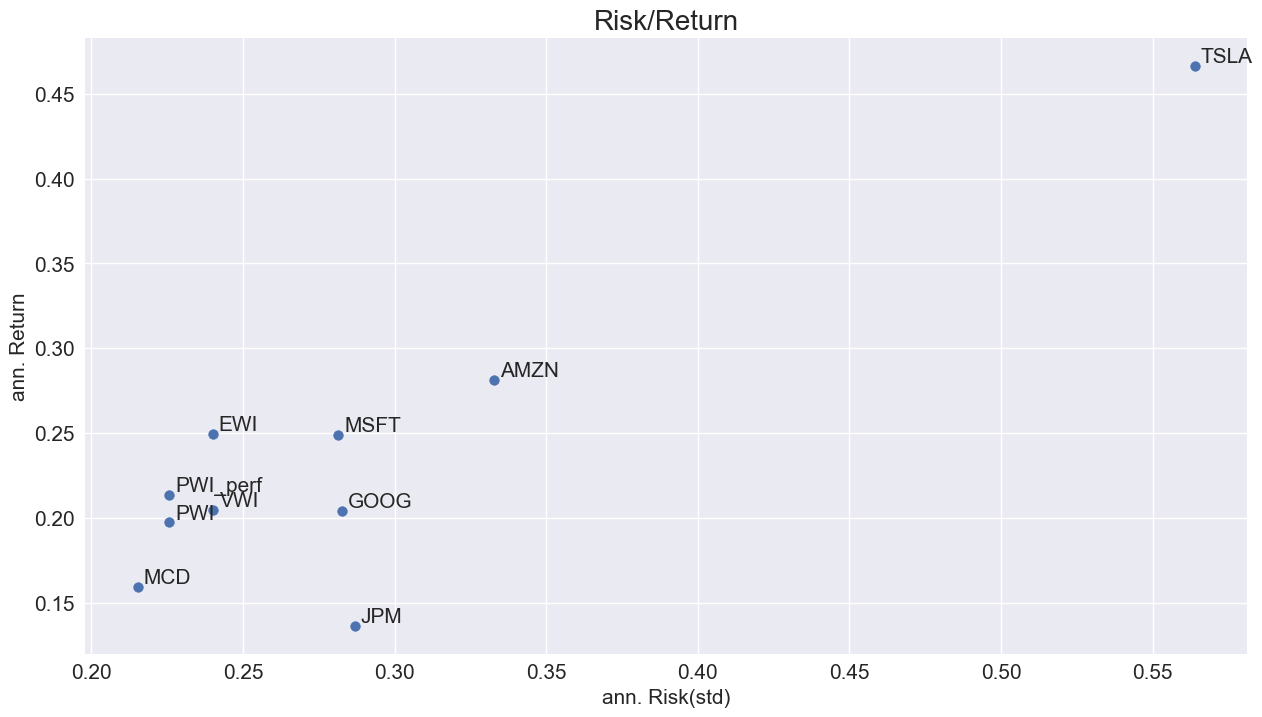

In [87]:
summary.plot(kind = "scatter", x = "std", y = "mean", figsize = (15, 8), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

The total return (PWI_perf) has a higher average return than PWI Index but the same standard deviation making the index slightly better. 

The total return Index(PWI_perf) is more realistic than the other indexes because we take into account the dividends, any corporate actions, stock splits and rights offering companies undertake. 

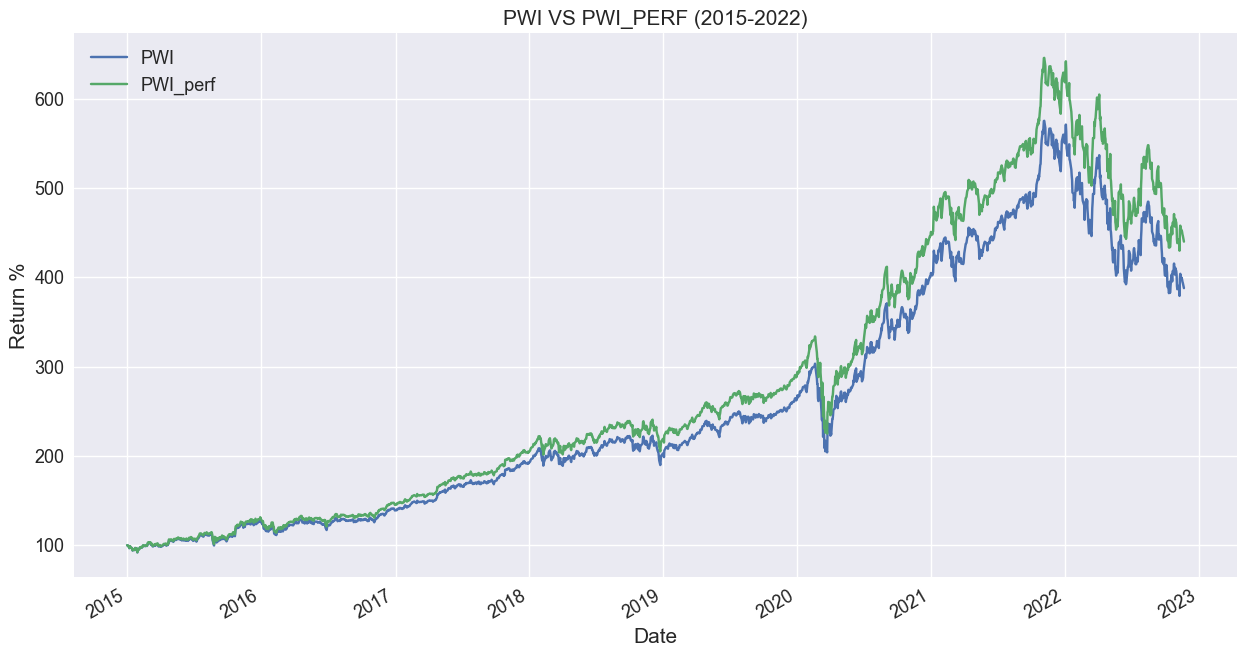

In [88]:
norm.iloc[:,[6,9]].plot(figsize=(15,8),fontsize=13)
plt.legend(fontsize=13)
plt.title('PWI VS PWI_PERF (2015-2022)',fontsize=15)
plt.ylabel('Return %',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.show()

The perfect price-weighted index outperformed the PWI at any date since 2015.